## **Linear Regression Model (using Pytorch)**


## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

## **Create an arbitrary data**
Imagine we don't know any thing about it, and want to prededict unseen data


In [2]:
# All about Target Function
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
# Linear Regression
X = torch.arange(start , end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
# Check the data
print(f'First 10 samples of Input Data: \n{X[:10]} | \nLength: {len(X)} | \nDimension: {X.ndim} | \nShape: {X.shape} | \nData Type: {X.dtype}')
print(f'First 10 samples of Output Data: \n{y[:10]} | \nLength: {len(y)} | \nDimension: {y.ndim} | \nShape: {y.shape} | \nData Type: {y.dtype}')


First 10 samples of Input Data: 
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) | 
Length: 50 | 
Dimension: 2 | 
Shape: torch.Size([50, 1]) | 
Data Type: torch.float32
First 10 samples of Output Data: 
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) | 
Length: 50 | 
Dimension: 2 | 
Shape: torch.Size([50, 1]) | 
Data Type: torch.float32


## **Split Data into Training and Test Sets**

In [4]:
train_split = int(0.8*len((X)))
# Training Set
X_train, y_train = X[:train_split], y[:train_split]
# Tets Set
X_test, y_test = X[train_split:], y[train_split:]

print(f'Number of training data: {len(X_train)}')
print(f'Number of test data: {len(X_test)}')

Number of training data: 40
Number of test data: 10


## **Visualize Data**

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    # figure
    plt.figure(figsize=(4,3), dpi=180, facecolor='#c0ebcc')
    # labels/title
    label_font={'size' : 6,
                'color' : '#3a393d',
                'weight' : 'bold'}
    title_font = {'size': 10,
                  'weight' : 'bold',
                  'color' : '#3a393d' }
    plt.xlabel('Inputs', fontdict=label_font)
    plt.ylabel('Outputs', fontdict=label_font)
    plt.title('Linear Regression', fontdict=title_font)
    # training Data
    plt.scatter(train_data, train_labels, color='y', s=4, label='Training Data')
    # test Data
    plt.scatter(test_data, test_labels, color='r', s=4, label='Test Data')
    # Predictions
    if predictions is not None:
      plt.scatter(test_data, predictions, color='k', s=4, label='Predictions')

    # Legend
    plt.legend(prop={'size':12})
    plt.show()



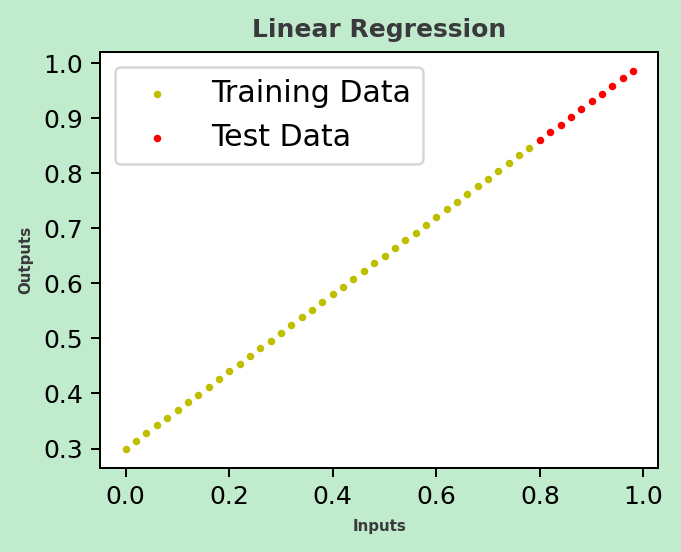

In [6]:
plot_predictions()

## **# About Code**
## `plt.scatter()`
`plt.scatter()` is a function in Matplotlib's Pyplot module that creates a scatter plot of points. In simpler terms, it allows you to plot individual data points on a graph, which is useful for visualizing the relationship between two variables.

1. syntax:
`plt.scatter(x, y, s=None, c=None, marker=None, alpha=None, linewidths=None edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)`

2. parameters:
* `x, y`: These are the data positions. They can be array-like objects or sequences of numbers. x represents the values on the horizontal axis (x-axis), and y represents the values on the vertical axis (y-axis). These are the core components of your scatter plot.
* `s`: This controls the size of the points. It can be a single number to make all points the same size or an array to set the size of each point individually.
* `c`: This sets the color of the points. It can be a single color value, a sequence of color values, or a colormap. You can use color to highlight different groups or features in your data.
* `marker`: This specifies the shape of the points. Common markers include circles ('o'), squares ('s'), and triangles ('^'). You can choose a marker that best suits your data and visualization goals.



## **Build Model**

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight  =nn.Parameter(torch.randn(1, #shape
                                           dtype= torch.float32,
                                           requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, #shape
                                         dtype = torch.float32,
                                         requires_grad = True))
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weight * X + self.bias

## **Check Contents of Model**

In [8]:
# Define manual seed
torch.manual_seed(42)

# Create an instance of the mode
model_0 = LinearRegressionModel()

# Check parametes
# method1:
print(list(model_0.parameters()))
# method2:
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


## **Make Predictions**

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [10]:
print(f'Number of test input data: {len(X_test)}')
print(f'Number of predictions: {len(y_preds)}')
print(f'Prediction values: {y_preds}')

Number of test input data: 10
Number of predictions: 10
Prediction values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


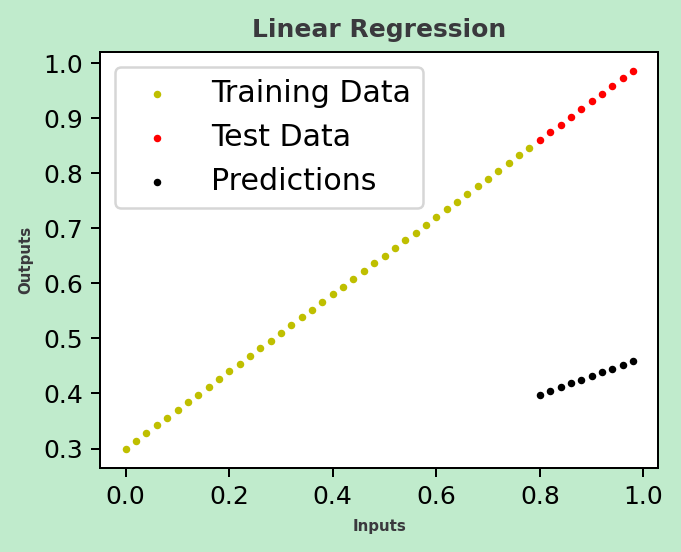

In [11]:
# Visualize
plot_predictions(predictions=y_preds)

## **Train Model**

In [12]:
# Define Loss and Optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01)


In [13]:
# Training/Test Loop
train_loss_value = []
test_loss_value=[]
epoch_count = []

epochs= 150
for epoch in range(epochs):

  # Train
  model_0.train()
  # forward pass
  y_preds = model_0(X_train)
  # Calculate the loss
  loss = loss_function(y_preds, y_train)
  # Zero Gradient
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  # Optimizer step step step
  optimizer.step()

  # Test
  model_0.eval()
  # forward pass
  with torch.inference_mode():
    test_preds = model_0(X_test)
  # Calculate the loss
  test_loss = loss_function(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_value.append(loss.detach().numpy())
    test_loss_value.append(test_loss.detach().numpy())
    print(f'Epoch: {epoch} | train_loss_value: {loss} | test_loss_value: {test_loss}')


Epoch: 0 | train_loss_value: 0.31288138031959534 | test_loss_value: 0.48106518387794495
Epoch: 10 | train_loss_value: 0.1976713240146637 | test_loss_value: 0.3463551998138428
Epoch: 20 | train_loss_value: 0.08908725529909134 | test_loss_value: 0.21729660034179688
Epoch: 30 | train_loss_value: 0.053148526698350906 | test_loss_value: 0.14464017748832703
Epoch: 40 | train_loss_value: 0.04543796554207802 | test_loss_value: 0.11360953003168106
Epoch: 50 | train_loss_value: 0.04167863354086876 | test_loss_value: 0.09919948130846024
Epoch: 60 | train_loss_value: 0.03818932920694351 | test_loss_value: 0.08886633068323135
Epoch: 70 | train_loss_value: 0.03476089984178543 | test_loss_value: 0.0805937647819519
Epoch: 80 | train_loss_value: 0.03132382780313492 | test_loss_value: 0.07232122868299484
Epoch: 90 | train_loss_value: 0.02788739837706089 | test_loss_value: 0.06473556160926819
Epoch: 100 | train_loss_value: 0.024458957836031914 | test_loss_value: 0.05646304413676262
Epoch: 110 | train_los

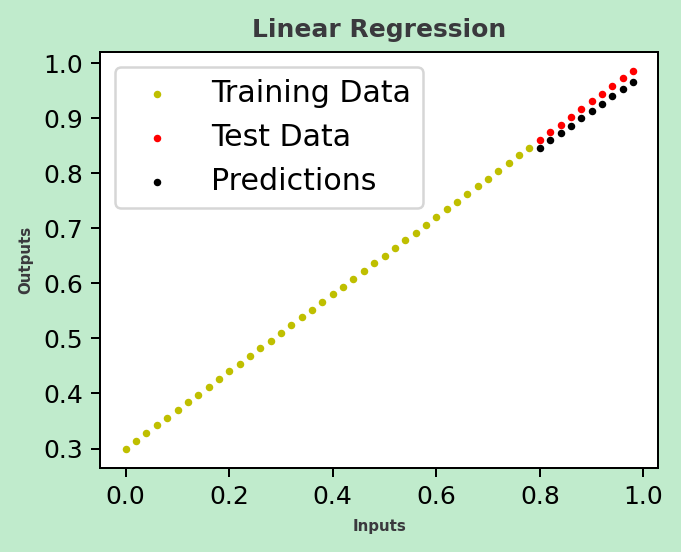

In [14]:
plot_predictions(predictions=test_preds)

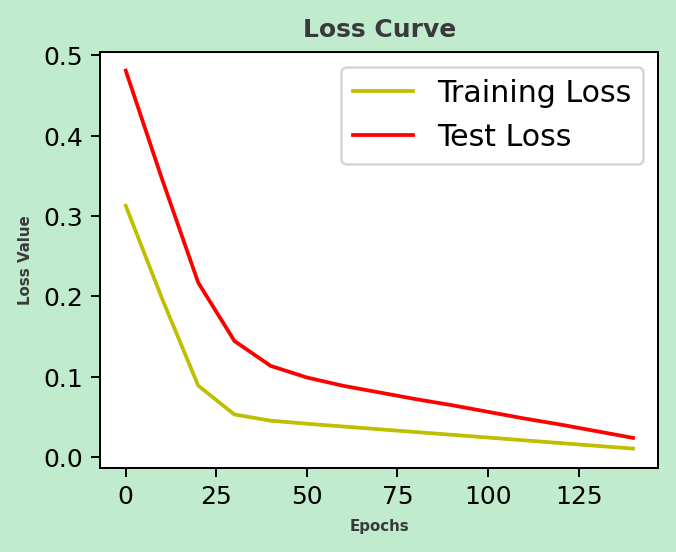

In [15]:
# Visualize the loss change
# figure
plt.figure(figsize=(4,3), dpi=180, facecolor='#c0ebcc')
# labels/title
label_font={'size' : 6,
            'color' : '#3a393d',
            'weight' : 'bold'}
title_font = {'size': 10,
              'weight' : 'bold',
              'color' : '#3a393d' }
plt.xlabel('Epochs', fontdict=label_font)
plt.ylabel('Loss Value', fontdict=label_font)
plt.title('Loss Curve', fontdict=title_font)
# training Data
plt.plot(epoch_count, train_loss_value, color='y', label='Training Loss')
# test Data
plt.plot(epoch_count, test_loss_value, color='r',label='Test Loss')
# Legend
plt.legend(prop={'size':12})
plt.show()


In [16]:
print(f'model_0 learn the folowing values for weight and bias: \n{model_0.state_dict()}')

model_0 learn the folowing values for weight and bias: 
OrderedDict([('weight', tensor([0.6638])), ('bias', tensor([0.3153]))])


## **Save Model**

In [17]:
# Import library
from pathlib import Path

# Create Directory
model_path = Path('Models')
model_path.mkdir(parents=True, exist_ok= True)

# Create file name
model_name = '01-Linear-Regression-Model.pth'

# Create model-save-path
model_save_path = model_path / model_name

# save
torch.save(obj= model_0.state_dict(),
           f= model_save_path)
print(f'The model saved in :{model_save_path}')


The model saved in :Models/01-Linear-Regression-Model.pth


## **check saving**

In [21]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

ls: cannot access 'models/01_pytorch_workflow_model_0.pth': No such file or directory


## **Load Model**

In [22]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_save_path))

<ipython-input-22-6d4e364c7485>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [24]:
# make predictions
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
print(f'Precictions from loaded model: {loaded_model_preds}')


Precictions from loaded model: tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])


In [26]:
# Check
test_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])